# Year 2023 Day 24


TODO Use Link Mark to materialize vectors https://observablehq.com/plot/marks/link
Reuse notebook 202311
Use 2d simplification for vector explanation then pythreejs
for interactive 3d visu, maybe evn anim?

Note: might also be perfect for visualizing the inputs from 202322 (falling bricks)

See https://pythreejs.readthedocs.io/en/stable/examples/Geometries.html fo threejs examples

See https://pythreejs.readthedocs.io/en/stable/examples/Geometries.html
and https://github.com/jupyter-widgets/pythreejs/blob/ebf601e805547e3ae6f656d3fe4ff89aa5ab2dac/examples/Geometries.ipynb
for example of successful notebook pre-rendering with pythreejs widgets

Note: This works when the notebook is left empty and then computed during the sphinx build
It does not work if it is pre-ran manually
So, the integration of notebook generation in the build process (GitHub action) is unavoidable,
at least for some that does not require heavy dependencies (unlike graphviz for instance)
Hopefully, JS-leaning notebooks using pythreejs and pyobservable plot should be easier to build.


In [454]:
from pyobsplot import Obsplot, Plot


op = Obsplot(renderer="jsdom", theme="dark")  # Literal['current','light','dark']

In [455]:
from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.y_2023.problem_202324 import AdventOfCodeProblem202324


problem = AdventOfCodeProblem202324()
problem

AdventOfCodeProblem202324(year=2023, day=24)

## Part 1

In Part 1, the z-axis is ignored.


### With Example Input


In [456]:
example_input = get_example_inputs_file_contents(2023)["test_problem_202324"][
    "EXAMPLE_INPUT"
]

In [457]:
example_hailstones = problem.parse_text_input(example_input)
example_hailstones

[Hailstone(position=array([19, 13, 30]), velocity=array([-2,  1, -2])),
 Hailstone(position=array([18, 19, 22]), velocity=array([-1, -1, -2])),
 Hailstone(position=array([20, 25, 34]), velocity=array([-2, -2, -4])),
 Hailstone(position=array([12, 31, 28]), velocity=array([-1, -2, -1])),
 Hailstone(position=array([20, 19, 15]), velocity=array([ 1, -5, -3]))]

In [458]:
import pandas as pd

from advent_of_code.y_2023.problem_202324 import Hailstone


def compute_vectors(hailstones: list[Hailstone], *, time_in_ns: int = 1):
    return pd.DataFrame(
        [
            (h.px, h.py, h.px + time_in_ns * h.vx, h.py + time_in_ns * h.vy, time_in_ns)
            for h in hailstones
        ],
        columns=["x1", "y1", "x2", "y2", "time_in_ns"],
    )


example_vectors = compute_vectors(example_hailstones, time_in_ns=1)
example_vectors

,x1,y1,x2,y2,time_in_ns
0,19,13,17,14,1
1,18,19,17,18,1
2,20,25,18,23,1
3,12,31,11,29,1
4,20,19,21,14,1


In [459]:
def show_links(
    lines_df: pd.DataFrame,
    *,
    rock_df: pd.DataFrame | None = None,
    width=400,
    strokeWidth=2,
    x_domain_test_area=(7, 27),
    y_domain_test_area=(7, 27),
    do_highlight_text=False,
):
    # lines_df : DataFrame with columns x1	y1	x2	y2
    marks = [
        Plot.link(
            lines_df,
            dict(
                x1=lines_df["x1"].to_list(),
                y1=lines_df["y1"].to_list(),
                x2=lines_df["x2"].to_list(),
                y2=lines_df["y2"].to_list(),
                markerEnd="arrow",
                strokeOpacity=1,
                curve="linear",
                strokeWidth=strokeWidth,
                stroke=lines_df["time_in_ns"].to_list(),
            ),
        ),
        Plot.rect(
            pd.DataFrame.from_records(
                {
                    "x1": [x_domain_test_area[0]],
                    "x2": [x_domain_test_area[1]],
                    "y1": [y_domain_test_area[0]],
                    "y2": [y_domain_test_area[1]],
                }
            ),
            {
                "x1": "x1",
                "y1": "y1",
                "x2": "x2",
                "y2": "y2",
                "stroke": "currentColor",
            },
        ),
        Plot.text(
            lines_df,
            {
                "x": lines_df["x2"].to_list(),
                "y": lines_df["y2"].to_list(),
                "text": lines_df["time_in_ns"].to_list(),
                "fill": "currentColor",
                "stroke": "black",
                "dy": -12,
                "filter": "highlight" if do_highlight_text else None,
            },
        ),
    ]

    if rock_df is not None:
        strokeDasharray = "3"

        marks.append(
            Plot.link(
                rock_df,
                dict(
                    x1=rock_df["x1"].to_list(),
                    y1=rock_df["y1"].to_list(),
                    x2=rock_df["x2"].to_list(),
                    y2=rock_df["y2"].to_list(),
                    markerEnd="arrow",
                    strokeOpacity=1,
                    curve="linear",
                    strokeWidth=2,
                    strokeDasharray=strokeDasharray,
                    # stroke=rock_df["time_in_ns"].to_list(),
                    stroke="red",
                ),
            ),
        )

    scheme = "Observable10"
    return op(  # type: ignore
        dict(
            grid=True,
            x=dict(
                label="x",
                tickFormat=".0s",
                nice=True,
                # domain=list(x_domain),
            ),
            y=dict(
                label="y",
                tickFormat=".0s",
                nice=True,
                # domain=list(y_domain),
            ),
            color={"type": "categorical", "scheme": scheme},
            marks=marks,
            aspectRatio=1,
            width=width,
        )
    )

The first diagram shows the position vectors, relative to their initial position, as defined in the example input.
Their direction is indicated by the arrow symbol.
A small floating text indicates the time for which the position was computed; $t=1$ in this first plot.

The test area, defined by $x = [7, 27]$ and $y = [7, 27]$ is materialized by a white box.


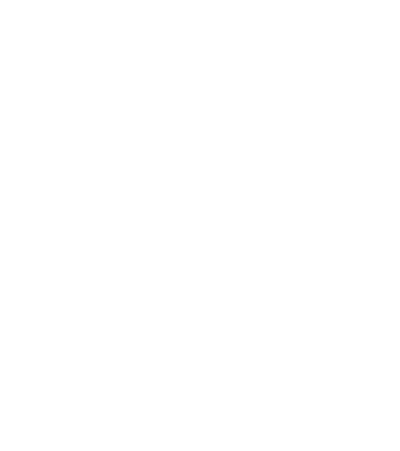

In [460]:
show_links(compute_vectors(example_hailstones, time_in_ns=1))

In the next plot, the successive relative position vectors are shown for $t=1, t=10, t=30$


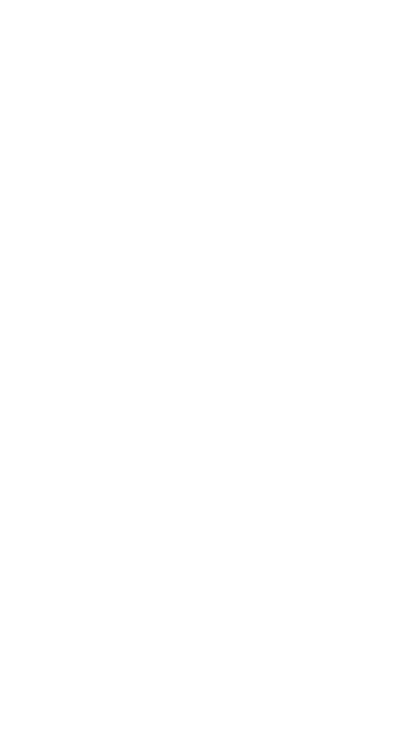

In [461]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [10, 1]]),
    strokeWidth=1,
)

We can visually assess that 2 hailstones' future paths cross inside the boundary of the test area, as mentioned in the problem input.


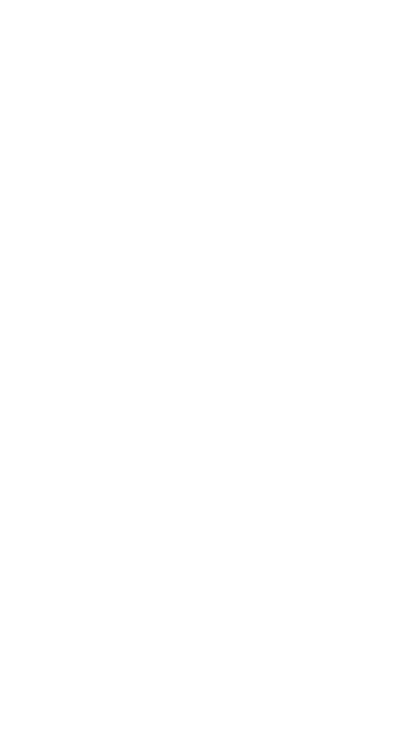

In [462]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [30, 10, 1]]),
    strokeWidth=1,
)

Finally, this plot is similar to the first one, but computed with `t=100` instead of `t=1`.


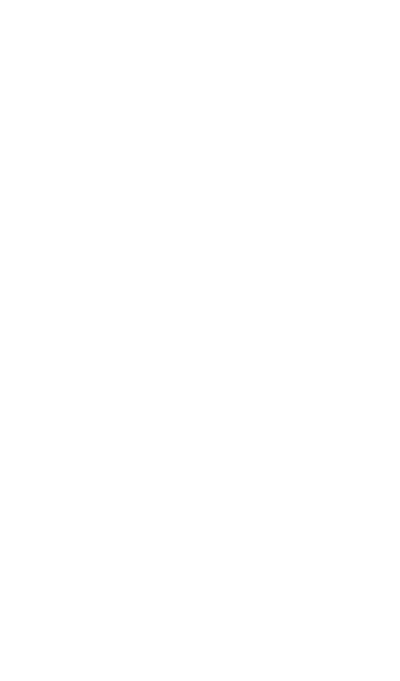

In [463]:
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in [100]]),
    strokeWidth=1,
)

We can see that some hailstones' trajectories seem to never cross.


### With Actual Input


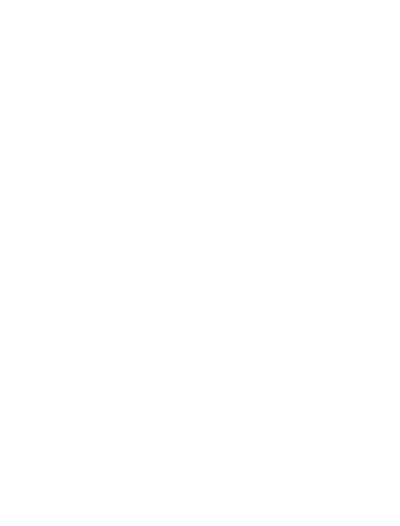

In [464]:
actual_hailstones = problem.parse_input_text_file()
domain = [200000000000000, 400000000000000]
show_links(
    pd.concat(
        [
            compute_vectors(actual_hailstones, time_in_ns=t)
            for t in [600000000000, 20000000000]
        ],
    ),
    strokeWidth=1,
    x_domain_test_area=domain,
    y_domain_test_area=domain,
    do_highlight_text=True,  # Only keep some text to avoid clutter
)

## Part 2


### With Example Input


The problem description gives the initial position and velocity of a rock that would intersect with every hailstones.


In [465]:
import numpy as np

rock = Hailstone(position=np.array([24, 13, 10]), velocity=np.array([-3, 1, 2]))

rock_df = compute_vectors(
    [rock],
    time_in_ns=1
)
rock_df

,x1,y1,x2,y2,time_in_ns
0,24,13,21,14,1


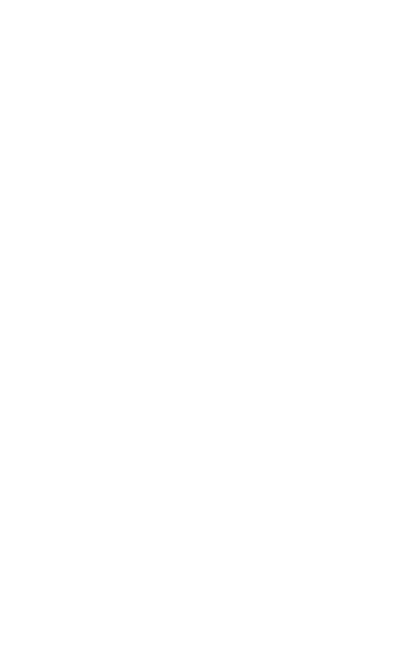

In [466]:
times = [10, 1]
show_links(
    pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
    rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
    strokeWidth=1,
)

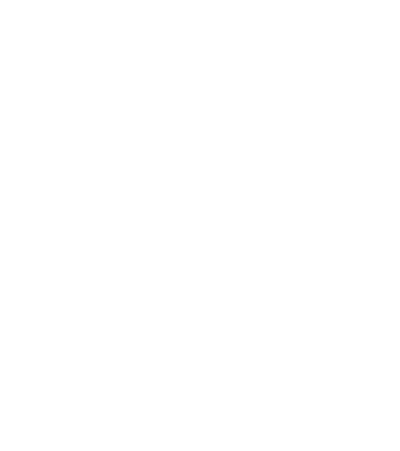

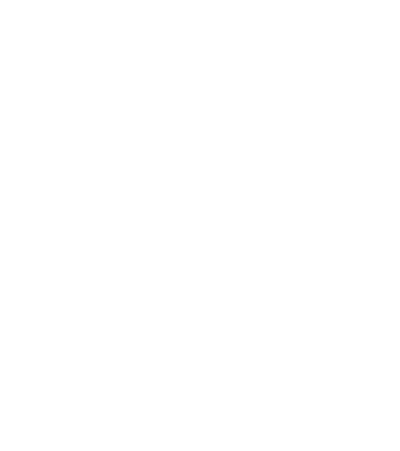

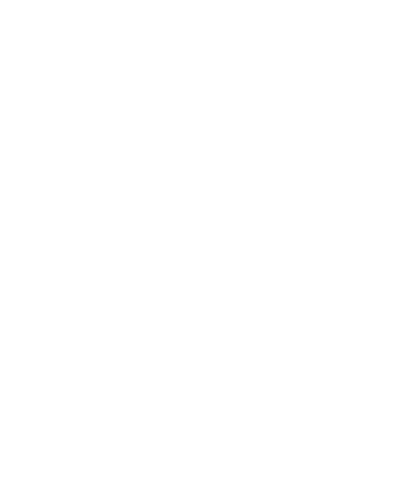

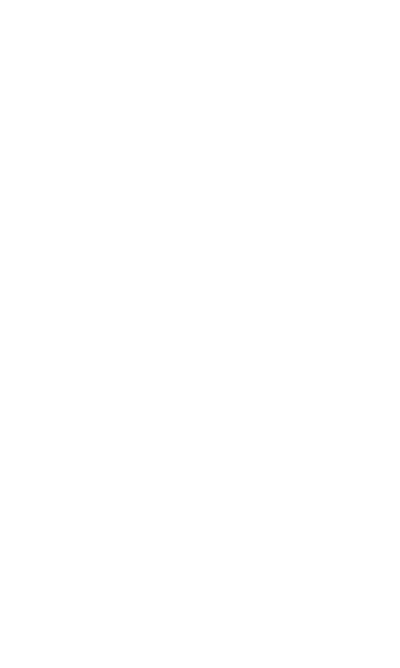

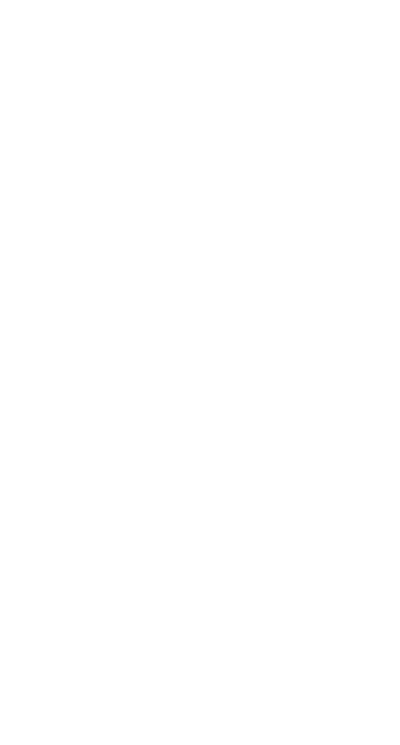

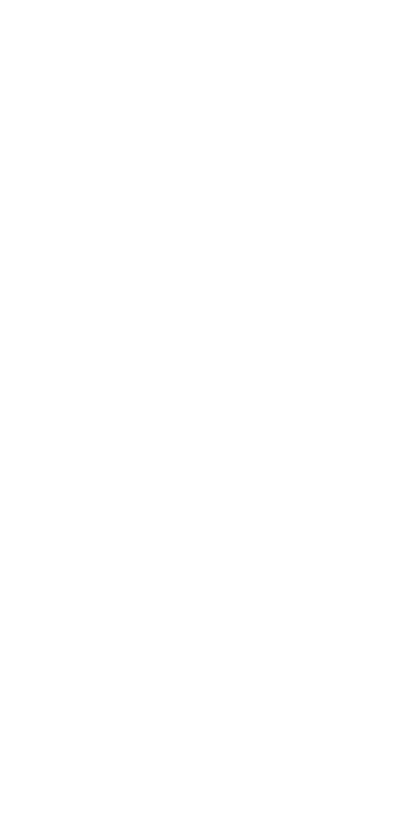

In [472]:

for i in range(1 + 1, 6 + 1 + 1):
    times = list(reversed(range(1, i)))
    show_links(
        pd.concat([compute_vectors(example_hailstones, time_in_ns=t) for t in times]),
        rock_df=pd.concat([compute_vectors([rock], time_in_ns=t) for t in times]),
        strokeWidth=1,
    )

We can see that the thrown rock intersects the 5 hailstones on integer times, at $t=1,3,4,5,6$.

$p_i$ and $v_i$ are 3D vectors, where $i$ is the hailstone identifier.

$p_i = p_i(t) = p(t_0) + t . v_i$



$$
\begin{aligned}
(p_2(t_2) - p_0(t_0)) &= \lambda_2 (p_k(t_1) - p_0(t_0))
\newline
(p_3(t_3) - p_0(t_0)) &= \lambda_3 (p_1(t_1) - p_0(t_0))
\end{aligned}
$$

For any $k \in \{1,2,3\}$, the position of the rock is a function of the time and can be found, because we have two positions and their respective times the rock must be at:

$$
\begin{aligned}
\newline
r(t) &= p_0(t_0) + (t - t_0) \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}
\newline
r(0) &= p_0(t_0) - t_0 \frac{p_k(t_k) + p_0(t_0)}{t_k-t_0}
\newline
r(0) &=   \frac{(t_k - t_0) p_0(t_0) - t_0 p_k(t_k) + t_0 p_0(t_0)}{t_k-t_0}
\newline
r(0) &=   \frac{t_k p_0(t_0) - t_0 p_0(t_0)  - t_0 p_k(t_k) + t_0 p_0(t_0)}{t_k-t_0}
\newline
r(0) &=   \frac{t_k p_0(t_0)   - t_0 p_k(t_k) }{t_k-t_0}

\end{aligned}

$$

TODO: an animation with manim showing the vectors "collapse" with time passing, becoming collinear at a singular time?

### With Actual Input
